## Apartat C

In [14]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('Financial Distress.csv')
#dataset = dataset.drop(columns=['x80'])
dataset.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


**Company:** Identificador de quina empresa es la mostra.<br />
**Time:** Diferents períodes de temps als quals pertanyen les dades. La durada de les sèries temporals varia entre 1 i 14 per a cada empresa.<br />
**Financial Distress:** La variable objectiu es denota per "Financial Distress" si és superior a -0,50 l'empresa s'ha de considerar sana (0). En cas contrari, es consideraria amb dificultats financeres (1).<br />
**x1-x83:** Les característiques indicades per x1 a x83 són algunes de les característiques financeres i no financeres de les empreses mostrejades. Aquestes característiques pertanyen al període de temps anterior, que s'hauria d'utilitzar per predir si l'empresa patirà dificultats financeres o no (classificació). El creador del dataset no ens proporciona els noms reals ni el significat de aquestes variables, a excepció de la característica x80, que sabem que és una variable categòrica i que representa el tipus d'industra a la qual es dedica la empresa.

In [15]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [16]:
dataset.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


<IPython.core.display.Javascript object>


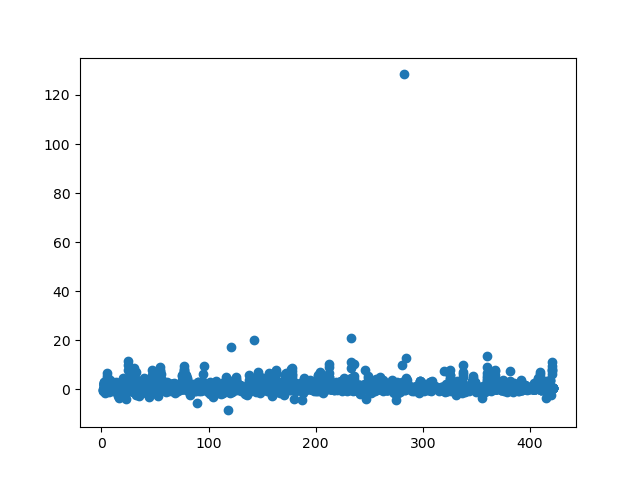

In [17]:
data = dataset.values
x = data[:, :]
x = np.delete(x, 2, 1)
y = data[:, 2]
plt.figure()
ax = plt.scatter(x[:,0], y)

(Hi ha un valor igual a 128 que es massa elevat i poc representatiu, molt probable que es tingui que treure)<br />
Eliminem la fila on es troba aquest valor, i tornem a visualitzar els punts de la mostra pel mateix atribut.

<IPython.core.display.Javascript object>


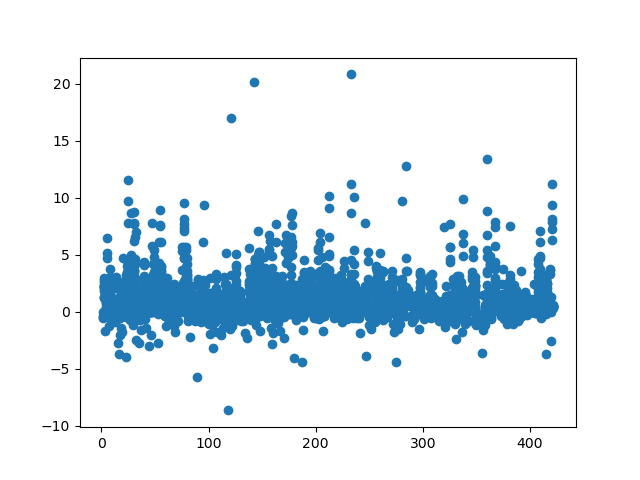

In [18]:
#print(y.max())
aux = np.where(y == y.max())[0]
y = np.delete(y, aux, 0)
x = np.delete(x, aux, 0)
plt.figure()
ax = plt.scatter(x[:,0], y)

#### Comprovem quins dels atributs tenen una distribució Gaussiana, per a la pregunta 2

##### Fent servir gràfiques:

<IPython.core.display.Javascript object>


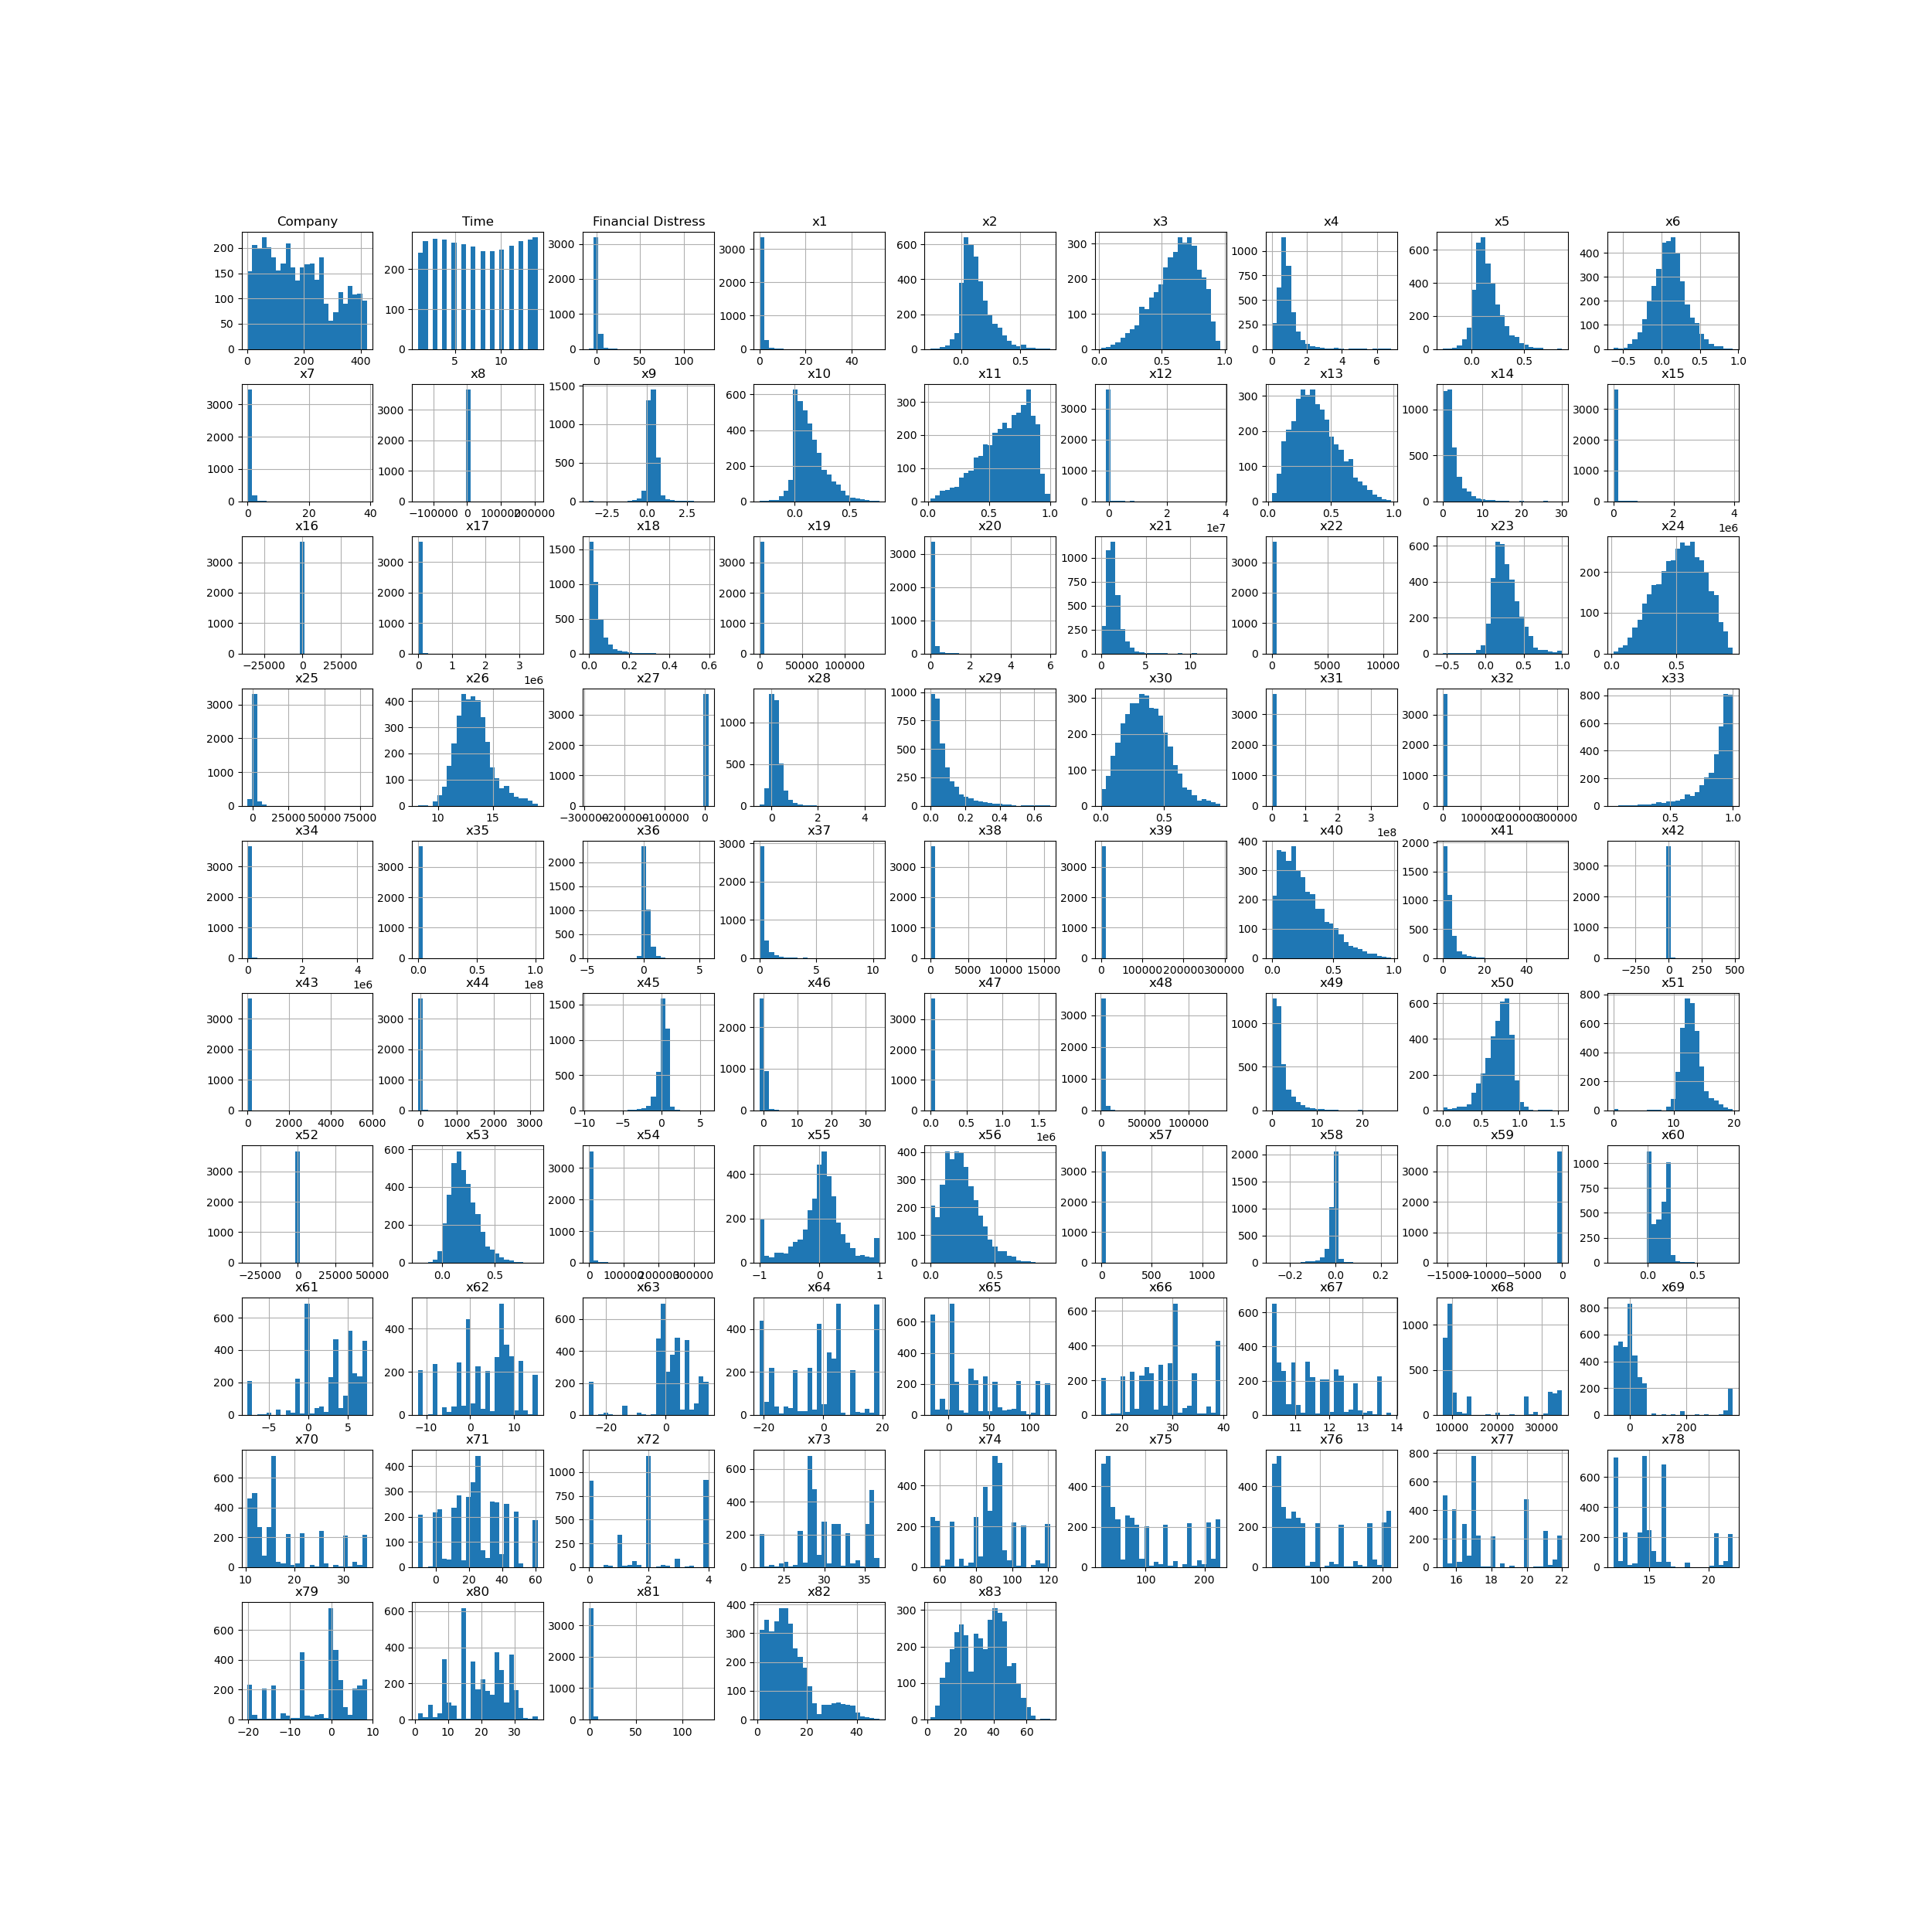

array([[<AxesSubplot:title={'center':'Company'}>,
        <AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Financial Distress'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:

In [8]:
dataset.hist(bins=25, figsize=(25, 25))

In [76]:

print(dataset.columns[7])
print(x[:,7])
print(np.percentile(x[:,7], 95))
#for id in range(0, len(dataset.columns)):
#    plt.figure()
#    plt.title(dataset.columns[id])
#    plt.boxplot(np.percentile(x[:,id], 95))

x5
[0.18827  0.18104  0.044865 ... 0.18389  0.17068  0.19786 ]
0.474645


<IPython.core.display.Javascript object>


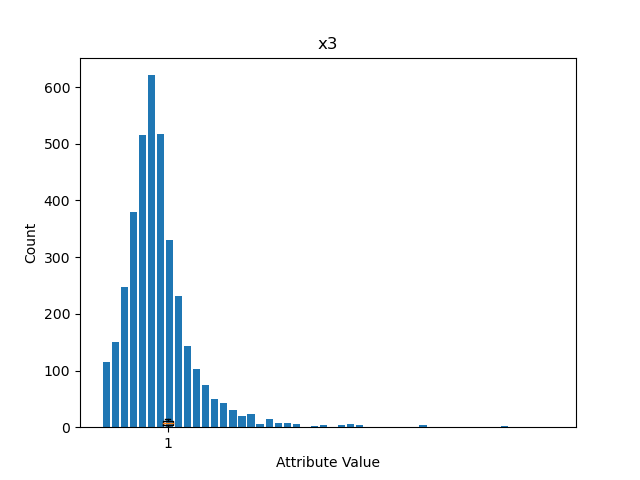

{'whiskers': [<matplotlib.lines.Line2D at 0x273be59b070>,
 'caps': [<matplotlib.lines.Line2D at 0x273be59b610>,
 'boxes': [<matplotlib.lines.Line2D at 0x273be58cd60>],
 'medians': [<matplotlib.lines.Line2D at 0x273be59bbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x273be59be80>],
 'means': []}

In [58]:
col = 5

plt.figure()
plt.title(dataset.columns[5])
plt.xlabel("Attribute Value")
plt.ylabel("Count")
plt.hist(x[:,col], bins=50, range=[np.min(x[:,col]), np.max(x[:,col])], histtype="bar", rwidth=0.8)
plt.boxplot(x[:,1])

<IPython.core.display.Javascript object>


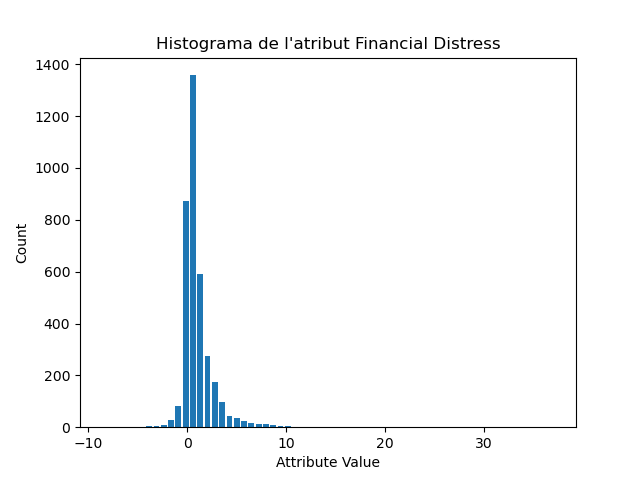

In [19]:
plt.figure()
plt.title("Histograma de l'atribut Financial Distress")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y, bins=40, range=[np.min(y), np.max(y)], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


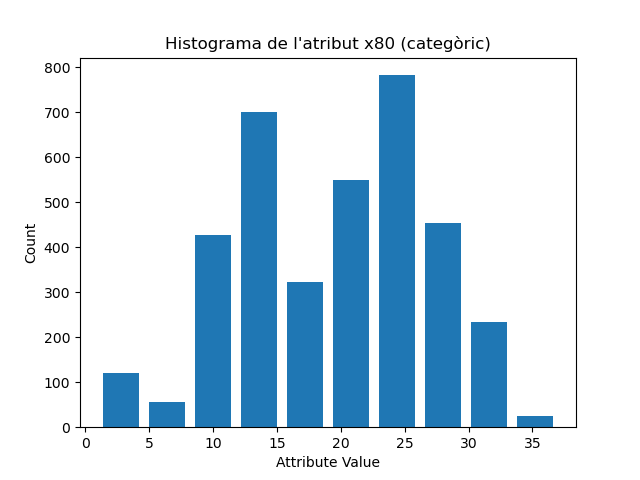

In [28]:
plt.figure()
plt.title("Histograma de l'atribut x80 (categòric)")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,81], bins=10, range=[np.min(x[:,81]), np.max(x[:,81])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


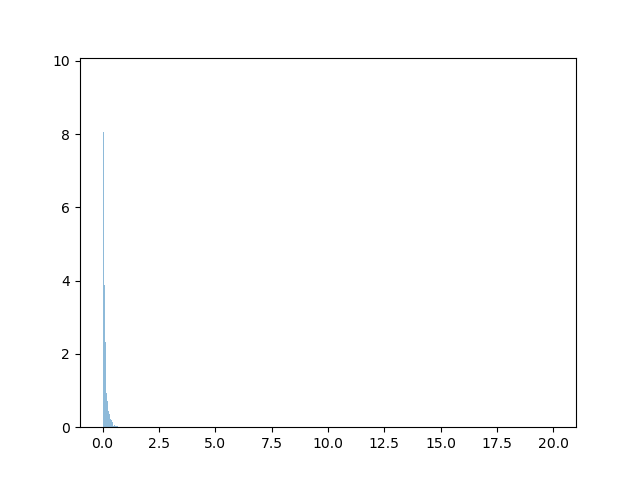

x30
19.715336420593843 7.508453903545111


In [34]:
plt.figure()

#plt.title("Histograma de l'atribut x80 (categòric)")
#plt.xlabel("Attribute Value")
#plt.ylabel("Count")
#plt.hist(x[:,81], bins=10, range=[np.min(x[:,81]), np.max(x[:,81])], histtype="bar", rwidth=0.8)
print(dataset.columns[32])
data = x[:,30]
_, bins, _ = plt.hist(data, 20, density=1, alpha=0.5)

mu, sigma = scipy.stats.norm.fit(x[:,81])

print(mu, sigma)

best_fit_line = scipy.stats.norm.pdf(20, mu, sigma)

plt.plot(20, best_fit_line)




##### Box plots

<IPython.core.display.Javascript object>


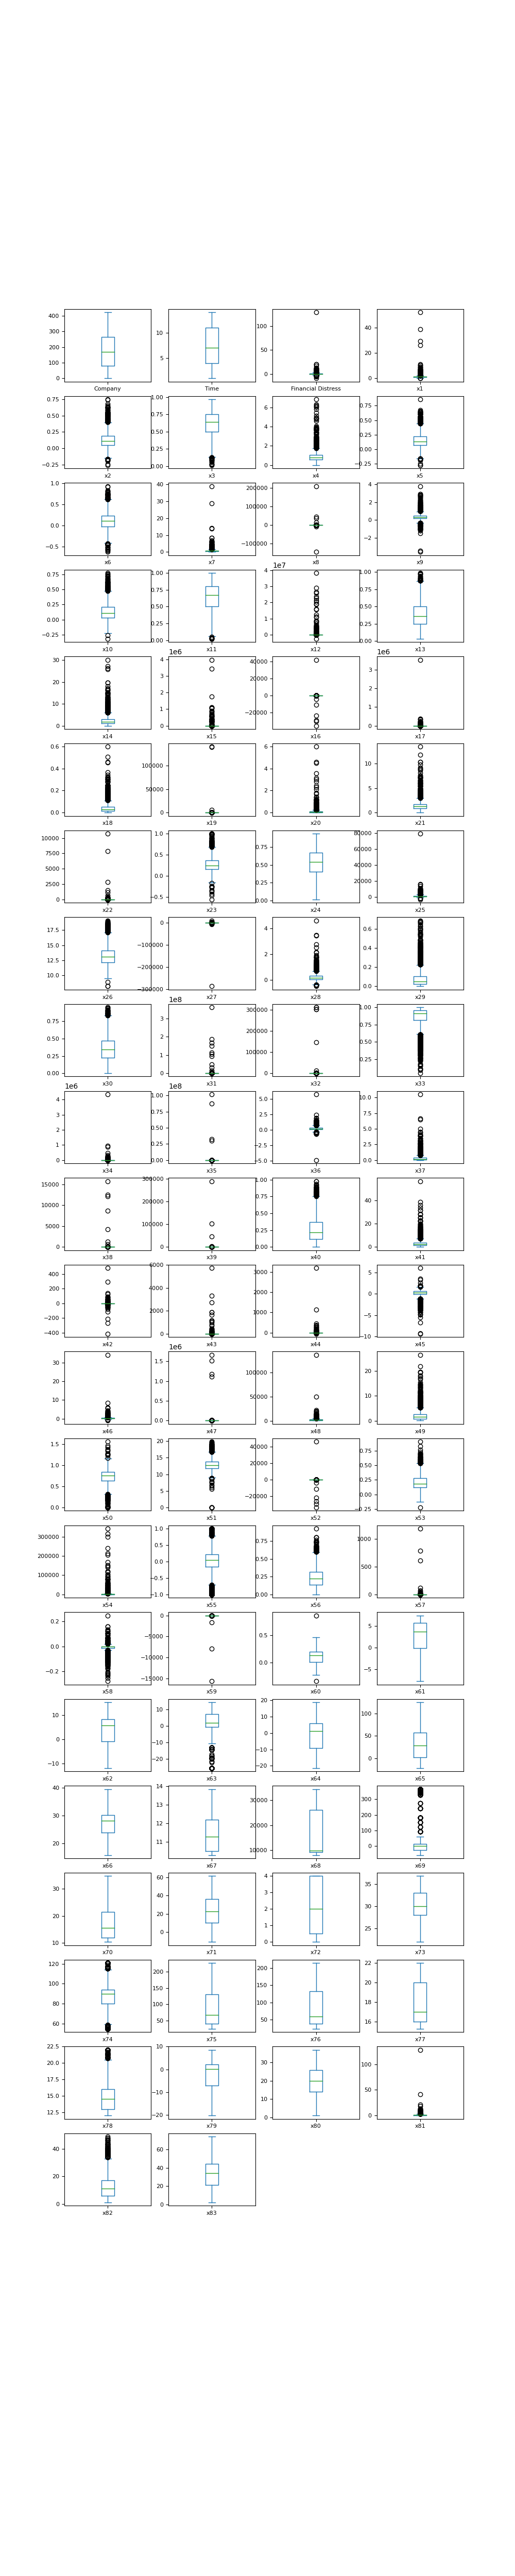

Company                  AxesSubplot(0.125,0.851898;0.168478x0.0281022)
Time                  AxesSubplot(0.327174,0.851898;0.168478x0.0281022)
Financial Distress    AxesSubplot(0.529348,0.851898;0.168478x0.0281022)
x1                    AxesSubplot(0.731522,0.851898;0.168478x0.0281022)
x2                       AxesSubplot(0.125,0.818175;0.168478x0.0281022)
                                            ...                        
x79                   AxesSubplot(0.327174,0.177445;0.168478x0.0281022)
x80                   AxesSubplot(0.529348,0.177445;0.168478x0.0281022)
x81                   AxesSubplot(0.731522,0.177445;0.168478x0.0281022)
x82                      AxesSubplot(0.125,0.143723;0.168478x0.0281022)
x83                   AxesSubplot(0.327174,0.143723;0.168478x0.0281022)
Length: 86, dtype: object

In [46]:
dataset.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize=8, figsize=(10, 50))

##### Fent servir test estadístic

In [36]:
from scipy.stats import normaltest

for i in range(0,len(dataset.columns)):
    print (i)
    data = dataset.values[:,i]
    # normality test
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

0
Statistics=789.573, p=0.000
Sample does not look Gaussian (reject H0)
1
Statistics=4880.189, p=0.000
Sample does not look Gaussian (reject H0)
2
Statistics=9739.139, p=0.000
Sample does not look Gaussian (reject H0)
3
Statistics=8125.768, p=0.000
Sample does not look Gaussian (reject H0)
4
Statistics=608.376, p=0.000
Sample does not look Gaussian (reject H0)
5
Statistics=155.042, p=0.000
Sample does not look Gaussian (reject H0)
6
Statistics=2688.266, p=0.000
Sample does not look Gaussian (reject H0)
7
Statistics=460.153, p=0.000
Sample does not look Gaussian (reject H0)
8
Statistics=31.552, p=0.000
Sample does not look Gaussian (reject H0)
9
Statistics=8301.499, p=0.000
Sample does not look Gaussian (reject H0)
10
Statistics=8488.239, p=0.000
Sample does not look Gaussian (reject H0)
11
Statistics=1152.210, p=0.000
Sample does not look Gaussian (reject H0)
12
Statistics=513.264, p=0.000
Sample does not look Gaussian (reject H0)
13
Statistics=219.273, p=0.000
Sample does not look Gau

No podem fer servir el test estadístic, probablement degut a que hi ha masses dades

Els atributs de Company, Time y x80 els eliminem

<IPython.core.display.Javascript object>


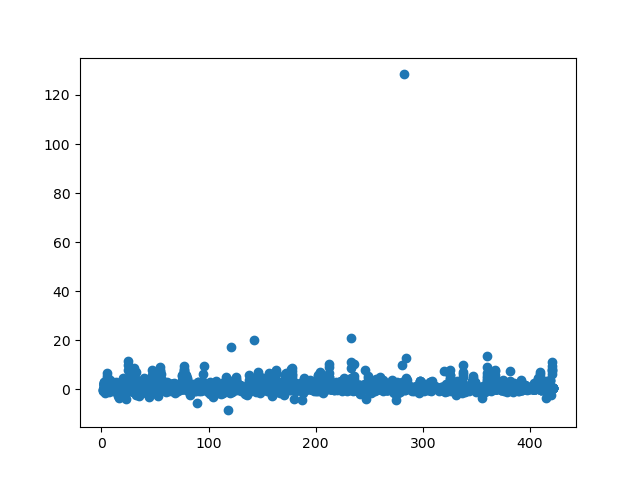

In [40]:
dataset.drop(columns=['Company','Time','x80'])
data = dataset.values
x = data[:, :]
#x = np.delete(x, 2, 1)
y = data[:, 2]
plt.figure()
ax = plt.scatter(x[:,0], y)

<IPython.core.display.Javascript object>


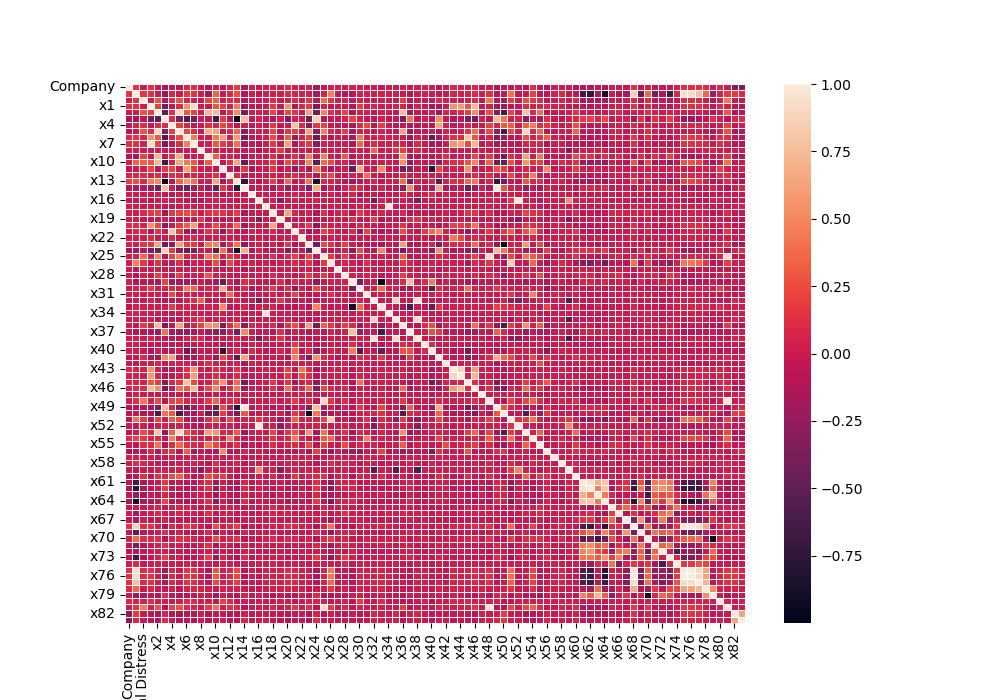

In [41]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.rcParams['figure.figsize'] = [10, 7]  # Ajustar les dimensions de la vista

plt.figure()

ax = sns.heatmap(correlacio, annot=False, linewidths=.5)

In [ ]:
# Mirem la relació entre atributs utilitzant la funció pairplot
sns.pairplot(dataset[:10])

<IPython.core.display.Javascript object>

Apliquem PCA als atributs x1-x83. Abans estandaritzem els valors (mitjana = 0, desviació estàndard = 1).<br />
Com a resultat inserim els nous atributs en substitució als originals (el valor n_components pot variar en funció de la qualitat final del model).

In [ ]:
from sklearn.decomposition import PCA

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

components = 2

aux_x = x[:,2:]
#aux_x = np.delete(aux_x, 79, 1)
aux_x = standarize(aux_x)
pca = PCA(n_components=components)
aux_pca = pca.fit_transform(aux_x)
x = np.concatenate((x[:,0:2], aux_pca), axis=1)
print(x)

In [ ]:
x_labels = ['Company', 'Time']
for i in range(2, x.shape[1]):
    x_labels.append('x' + str(i-1))
x_labels.append('Financial Distress')
#print(x[:,:2])
#print(y[np.newaxis].T)
new_dataset = pd.DataFrame(np.append(x, y[np.newaxis].T, axis=1), columns = x_labels)
new_dataset

In [ ]:
import seaborn as sns

correlacio = new_dataset.corr()
plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [ ]:
relacio = sns.pairplot(new_dataset)

**1. Quin és el tipus de cada atribut?**<br />
En total hi han 86 atributs diferents, dels quals 5 son int64 (Company, Time, x80, x82, x83). La resta són float64.<br />
**2. Quins atributs tenen una distribució Gaussiana?**<br />
L'atribut Financial Distress.<br />
**3. Quin és l'atribut objectiu? Per què?**<br />
(TBD)<br />

## Apartat B

(Provar regressor lineal per atributs diferents)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regression(x, y):
    regr = LinearRegression()
    regr.fit(x, y)
    return regr

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

n_attribute = 2

attribute = new_dataset.values[:,n_attribute].reshape(new_dataset.values.shape[0], 1)
y = new_dataset.values[:,-1].reshape(new_dataset.values.shape[0], 1)
regr = regression(attribute, y) 
predicted = regr.predict(attribute)

plt.figure()
ax = plt.scatter(new_dataset.values[:,n_attribute], y)
plt.plot(attribute[:,0], predicted, 'r')

MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)
print(new_dataset.values[:,:-1])

In [ ]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

#print(x[:,2:], y)
x_train, y_train, x_val, y_val = split_data(x[:,2:], y)
mses, r2s = [], []

for i in range(x_train.shape[1]):
    x_t = x_train[:,i]
    x_v = x_val[:,i]
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v))
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut x%d: %f" %(i+1, error))
    print("R2 score en atribut x%d: %f" %(i+1, r2))

**1. Quin són els atributs més importants per fer una bona predicció?**<br />
L'atribut x1.<br />
**2. Amb quin atribut s'assoleix un MSE menor?**<br />
L'atribut x1.<br />
**3. Quina correlació hi ha entre els atributs de la vostra base de dades?**<br />
(TBD)<br />
**4. Com influeix la normalització en la regressió?**<br />
(TBD)<br />
**5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?**<br />
(TBD)<br />
**6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?**<br />
(TBD)<br />